# 뉴럴 네트워크 다중분류 (아이리스 데이터셋)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import keras

##1.데이터 준비

In [2]:
! wget https://raw.githubusercontent.com/devdio/datasets/refs/heads/main/iris.csv

--2025-01-02 07:42:03--  https://raw.githubusercontent.com/devdio/datasets/refs/heads/main/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3858 (3.8K) [text/plain]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   3.77K  --.-KB/s    in 0s      

2025-01-02 07:42:03 (57.5 MB/s) - ‘iris.csv’ saved [3858/3858]



In [9]:
df = pd.read_csv("/content/iris.csv")
df.shape

(150, 5)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
df.columns = [col.replace(' ','_') for col in df.columns]
df

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [13]:
df.isna().sum()

,0
Sepal_Length,0
Sepal_Width,0
Petal_Length,0
Petal_Width,0
Species,0


##2.데이터분리

In [15]:
X = df.drop('Species', axis = 1)
y = df['Species']

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

##3.스케일링

In [18]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
# 학습
ss.fit(X_train)
# 데이터 변경
X_train_s = ss.transform(X_train)

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(y_train)
y_train_e = le.transform(y_train)
y_train_e

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [23]:
le.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

##원핫인코딩

In [25]:
from keras.utils import to_categorical

y_train_o = to_categorical(y_train_e)
y_train_o[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [26]:
type(X_train_s), type(y_train_o)

(numpy.ndarray, numpy.ndarray)

##4.모델 만들기

In [28]:
X_train_s.shape

(120, 4)

In [29]:
from keras import layers

model = keras.Sequential([
    layers.Input((4,)),
    layers.Dense(units=16, activation='relu'),
    layers.Dense(units=8, activation='relu'),
    layers.Dense(units=3, activation='softmax')
    # 입력 쉐입, 출력 개수, 활성화 함수만 맞추면 오류 안남
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 243 (972.00 B)

 Trainable params: 243 (972.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 회귀, 다중, 이진 분류 차이점 구성 알아야 함

In [33]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics = ['acc']
)

In [34]:
epochs = 300
batch_size = 32

history = model.fit(
    X_train_s, y_train_o,
        epochs = epochs,
        batch_size=batch_size,
        validation_split=0.2
)

Epoch 1/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - acc: 0.3138 - loss: 1.0472 - val_acc: 0.4167 - val_loss: 0.9959
Epoch 2/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - acc: 0.3229 - loss: 1.0283 - val_acc: 0.4583 - val_loss: 0.9787
Epoch 3/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - acc: 0.3438 - loss: 1.0375 - val_acc: 0.5000 - val_loss: 0.9620
Epoch 4/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - acc: 0.4388 - loss: 0.9881 - val_acc: 0.5833 - val_loss: 0.9454
Epoch 5/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - acc: 0.4661 - loss: 0.9730 - val_acc: 0.6250 - val_loss: 0.9291
Epoch 6/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.5417 - loss: 0.9779 - val_acc: 0.6250 - val_loss: 0.9139
Epoch 7/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.5404 - loss: 0.9749 - val_acc: 0.6250 - val_loss: 0.8988
Epoch 8/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - acc: 0.6211 - loss: 0.9652 - val_acc: 0.6667 - val_loss: 0.8836
Epoch 9/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.7096 - loss:

In [35]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(16,8))
  plt.subplot(1,2,1)
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.plot(hist['epoch'], hist['loss'], label='train_loss')
  plt.plot(hist['epoch'], hist['val_loss'], label='val_loss')
  plt.title('Loss Curve')
  plt.legend()

  plt.subplot(1,2,2)
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.plot(hist['epoch'], hist['acc'], label='train_acc')
  plt.plot(hist['epoch'], hist['val_acc'], label='val_acc')
  plt.title('acc Curve')
  plt.legend()

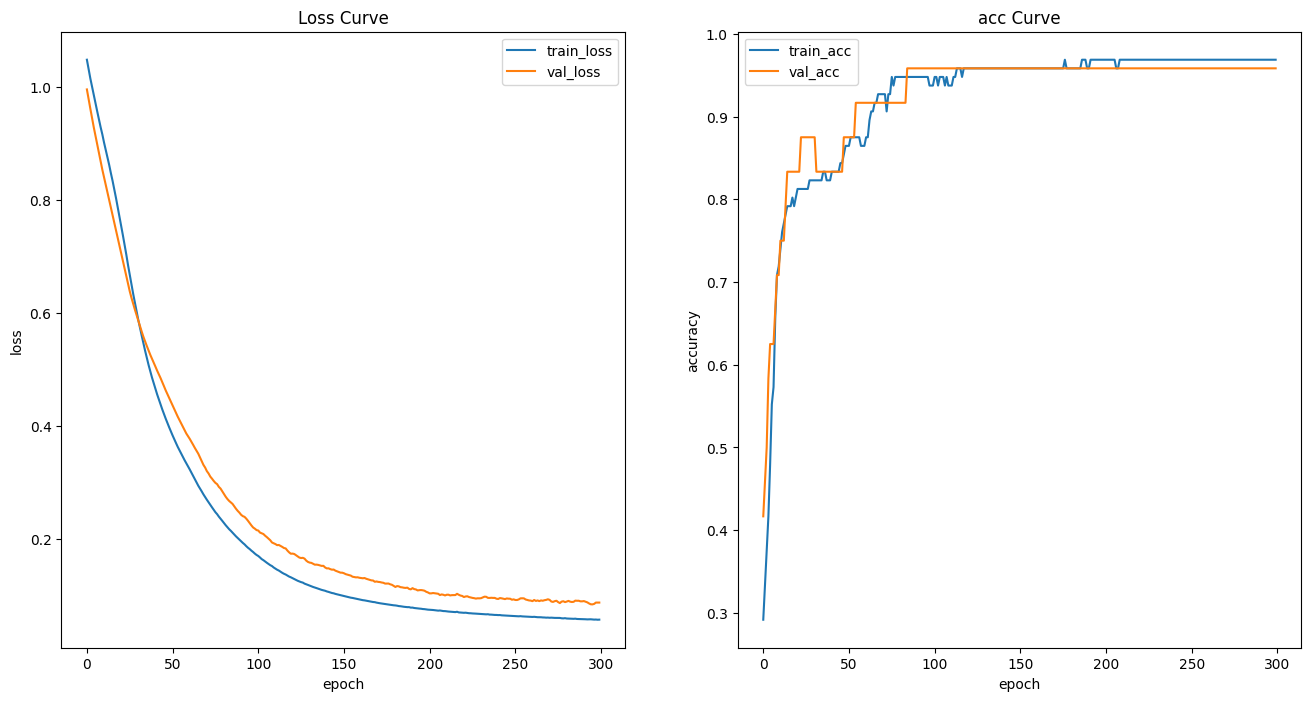

In [36]:
plot_history(history)
# 오버피팅 그래프 트레인과 테스트의 로스가 너무 벌어지기 시작하면 오버피팅 시작
# 오버피팅 방지를 위해 얼리스탑 기능을 해놓을 수 있음

##5.테스트

In [56]:
X_test_s = ss.transform(X_test)

In [57]:
y_test_e = le.transform(y_test)

In [58]:
y_test_o = to_categorical(y_test_e)

In [59]:
y_pred = model.predict(X_test_s)
# 가장 큰 값을 가지는 인덱스를 리턴하도록
y_pred = np.argmax(y_pred, axis=1)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [60]:
y_test_e

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

##6.평가지표

In [61]:
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import precision_score, f1_score
from sklearn.metrics import confusion_matrix

def print_metrics(y_true, y_pred):
  acc = accuracy_score(y_true, y_pred)
  re = recall_score(y_true, y_pred, average='macro')
  pre = precision_score(y_true, y_pred, average='macro')
  f1 = f1_score(y_true, y_pred, average='macro')

  print("acc:", acc)
  print("recall:", np.around(re, 4))
  print("precision:", np.around(pre, 4))
  print("f1:", np.around(f1, 4))

  cfm = confusion_matrix(y_true, y_pred)
  s = sns.heatmap(cfm, annot=True, cmap='Blues', fmt='d', cbar=False)
  s.set(xlabel='Prediction', ylabel='Actual')
  plt.show()

acc: 1.0
recall: 1.0
precision: 1.0
f1: 1.0


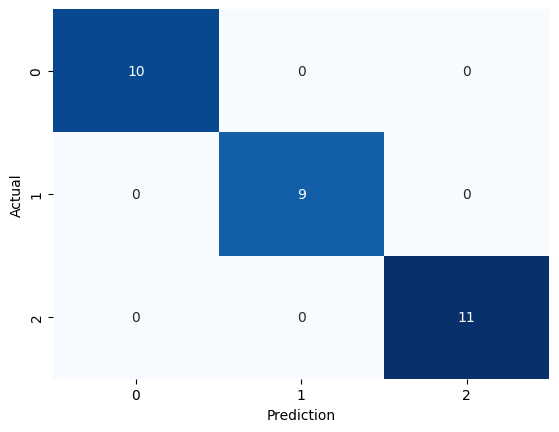

In [64]:
print_metrics(y_test_e, y_pred)